In [2]:
import torch
import seaborn as sns
import numpy as np
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [3]:
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim

In [4]:
from PIL import Image
import os
print(os.getcwd())

/gpfs/home/nhansen3/DrivingSimProj/notebooks


In [5]:
image_path = "/projects/dsci410_510/DAVID-sim/m1596437/Images/Video_000/v000_0000.png"  
img_var = Image.open(image_path)
np.asarray(img_var).shape

(600, 800, 3)

In [6]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [7]:
test_folder = "/projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_009" 

In [8]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
PEDESTRIAN_COLOR = (220, 20, 60)

def count_pedestrian_pixels(image_path, pedestrian_color=PEDESTRIAN_COLOR):
    
    image = cv2.imread(image_path)  
    if image is None:
        print(f"Error loading {image_path}")
        return 0
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    mask = (image[:, :, 0] == pedestrian_color[0]) & \
           (image[:, :, 1] == pedestrian_color[1]) & \
           (image[:, :, 2] == pedestrian_color[2])
    
    return np.sum(mask)

#risk thresholds are still made up and not real !!!
def classify_risk(pixel_count):
    if pixel_count > 2000:  
        return "High"
    elif 1000 <= pixel_count <= 2000:
        return "Medium"
    else:
        return "Low"

In [10]:
image_files = [f for f in os.listdir(test_folder) if f.endswith((".png", ".jpg", ".jpeg"))]

data_list = []

for image_file in image_files[:1000]: 
    image_path = os.path.join(test_folder, image_file)
    pixel_count = count_pedestrian_pixels(image_path)
    risk_level = classify_risk(pixel_count)
    
    data_list.append({"image": image_file, "pedestrian_pixels": pixel_count, "risk_level": risk_level})
    
df = pd.DataFrame(data_list)
print(df.head(), len(df))

           image  pedestrian_pixels risk_level
0  v009_0011.png                216        Low
1  v009_0143.png                179        Low
2  v009_0174.png                200        Low
3  v009_0256.png                338        Low
4  v009_0113.png                221        Low 364


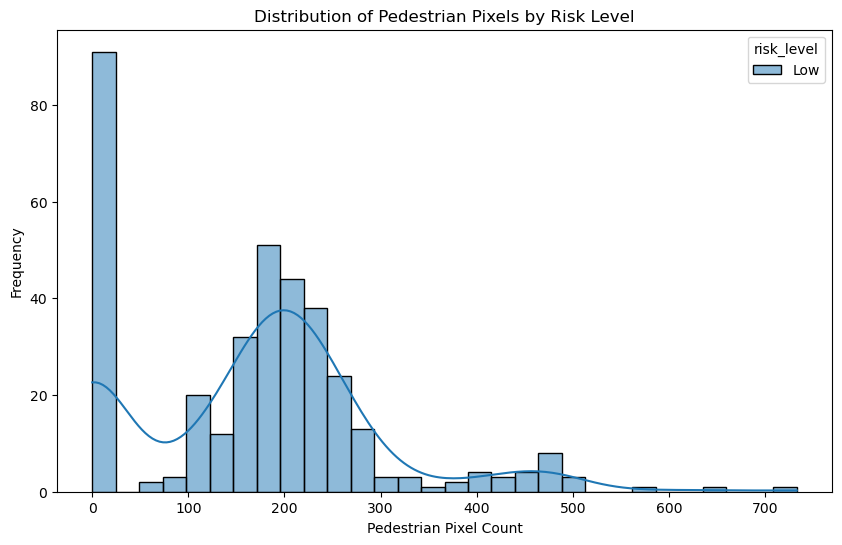

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df, x="pedestrian_pixels", hue="risk_level", bins=30, kde=True)
plt.xlabel("Pedestrian Pixel Count")
plt.ylabel("Frequency")
plt.title("Distribution of Pedestrian Pixels by Risk Level")
plt.show()

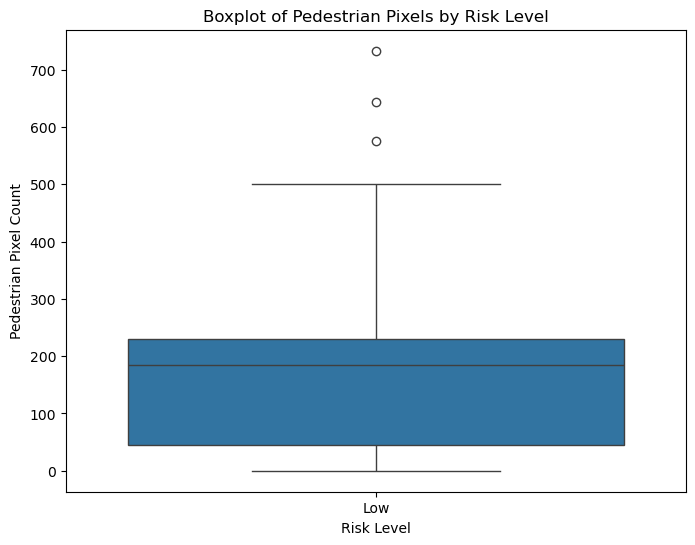

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="risk_level", y="pedestrian_pixels")
plt.xlabel("Risk Level")
plt.ylabel("Pedestrian Pixel Count")
plt.title("Boxplot of Pedestrian Pixels by Risk Level")
plt.show()

In [14]:
import os
import pandas as pd
from pathlib import Path
from tqdm import tqdm

PEDESTRIAN_COLOR = (220, 20, 60)

def count_pedestrian_pixels(image_path, pedestrian_color=PEDESTRIAN_COLOR):
    """Counts the number of pedestrian pixels in an image."""
    image = cv2.imread(str(image_path))
    if image is None:
        print(f"Error loading {image_path}")
        return 0
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    mask = (image[:, :, 0] == pedestrian_color[0]) & \
           (image[:, :, 1] == pedestrian_color[1]) & \
           (image[:, :, 2] == pedestrian_color[2])
    return int(np.sum(mask))  # Ensure integer output

def classify_risk(pixel_count):
    """Classifies pedestrian risk based on pixel count."""
    if pixel_count > 1000:
        return "High"
    elif 250 <= pixel_count <= 1000:
        return "Medium"
    else:
        return "Low"

# List of folders to process
label_folders = [
    "/projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_000",
    "/projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_001",
    "/projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_002",
    "/projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_003",
    "/projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_004",
    "/projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_005",
    "/projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_006",
    "/projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_007",
    "/projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_008",
    "/projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_009",
    "/projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_010",
    "/projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_011",
    "/projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_012",
    "/projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_013",
    "/projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_014",
    "/projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_015",
    "/projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_016",
    "/projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_017",
    "/projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_018",
    "/projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_019",
    "/projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_020",
    "/projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_021",
    "/projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_022",
    "/projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_023",
    "/projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_024",
    "/projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_025",
    "/projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_026",
    "/projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_027"
]

image_folders = ["/projects/dsci410_510/DAVID-sim/m1596437/Images/Video_000",
                 "/projects/dsci410_510/DAVID-sim/m1596437/Images/Video_001",
                 "/projects/dsci410_510/DAVID-sim/m1596437/Images/Video_002",
                 "/projects/dsci410_510/DAVID-sim/m1596437/Images/Video_003",
                 "/projects/dsci410_510/DAVID-sim/m1596437/Images/Video_004",
                 "/projects/dsci410_510/DAVID-sim/m1596437/Images/Video_005",
                 "/projects/dsci410_510/DAVID-sim/m1596437/Images/Video_006",
                 "/projects/dsci410_510/DAVID-sim/m1596437/Images/Video_007",
                 "/projects/dsci410_510/DAVID-sim/m1596437/Images/Video_008",
                 "/projects/dsci410_510/DAVID-sim/m1596437/Images/Video_009",
                 "/projects/dsci410_510/DAVID-sim/m1596437/Images/Video_010",
                 "/projects/dsci410_510/DAVID-sim/m1596437/Images/Video_011",
                 "/projects/dsci410_510/DAVID-sim/m1596437/Images/Video_012",
                 "/projects/dsci410_510/DAVID-sim/m1596437/Images/Video_013",
                 "/projects/dsci410_510/DAVID-sim/m1596437/Images/Video_014",
                 "/projects/dsci410_510/DAVID-sim/m1596437/Images/Video_015",
                 "/projects/dsci410_510/DAVID-sim/m1596437/Images/Video_016",
                 "/projects/dsci410_510/DAVID-sim/m1596437/Images/Video_017",
                 "/projects/dsci410_510/DAVID-sim/m1596437/Images/Video_018",
                 "/projects/dsci410_510/DAVID-sim/m1596437/Images/Video_019",
                 "/projects/dsci410_510/DAVID-sim/m1596437/Images/Video_020",
                 "/projects/dsci410_510/DAVID-sim/m1596437/Images/Video_021",
                 "/projects/dsci410_510/DAVID-sim/m1596437/Images/Video_022",
                 "/projects/dsci410_510/DAVID-sim/m1596437/Images/Video_023",
                 "/projects/dsci410_510/DAVID-sim/m1596437/Images/Video_024",
                 "/projects/dsci410_510/DAVID-sim/m1596437/Images/Video_025",
                 "/projects/dsci410_510/DAVID-sim/m1596437/Images/Video_026",
                 "/projects/dsci410_510/DAVID-sim/m1596437/Images/Video_027"]

assert len(label_folders) == len(image_folders), "Mismatch between labeled and unlabeled folders!"

unlabeled_image_map = {}

for image_folder in image_folders:
    folder_path = Path(image_folder)
    if folder_path.exists():
        for img_path in folder_path.glob("*.png"):
            unlabeled_image_map[img_path.name] = str(img_path)

data_list = []

for label_folder in label_folders:
    label_path = Path(label_folder)

    if not label_path.exists():
        print(f"Warning: Folder {label_folder} does not exist. Skipping...")
        continue

    image_files = list(label_path.glob("*.png"))

    if not image_files:
        print(f"Warning: No images found in {label_folder}. Skipping...")
        continue

    print(f"Processing {len(image_files)} images in {label_folder}...")

    for image_path in tqdm(image_files, desc=f"Processing {label_folder}"):
        pixel_count = count_pedestrian_pixels(str(image_path))
        risk_level = classify_risk(pixel_count)
        unlabeled_path = unlabeled_image_map.get(image_path.name, "Not Found")

        data_list.append({
            "labeled_image_path": str(image_path),
            "unlabeled_image_path": unlabeled_path,
            "pedestrian_pixels": pixel_count,
            "risk_level": risk_level
        })

df = pd.DataFrame(data_list)

# Save to CSV!!!
df.to_csv("pedestrian_risk_analysis.csv", index=False)
print(df.head(), len(df))

Processing 305 images in /projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_000...


Processing /projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_000: 100%|██████████| 305/305 [00:01<00:00, 179.58it/s]


Processing 342 images in /projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_001...


Processing /projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_001: 100%|██████████| 342/342 [00:01<00:00, 178.04it/s]


Processing 363 images in /projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_002...


Processing /projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_002: 100%|██████████| 363/363 [00:02<00:00, 174.03it/s]


Processing 350 images in /projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_003...


Processing /projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_003: 100%|██████████| 350/350 [00:01<00:00, 177.94it/s]


Processing 335 images in /projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_004...


Processing /projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_004: 100%|██████████| 335/335 [00:01<00:00, 176.34it/s]


Processing 390 images in /projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_005...


Processing /projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_005: 100%|██████████| 390/390 [00:02<00:00, 169.63it/s]


Processing 397 images in /projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_006...


Processing /projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_006: 100%|██████████| 397/397 [00:02<00:00, 168.19it/s]


Processing 443 images in /projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_007...


Processing /projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_007: 100%|██████████| 443/443 [00:02<00:00, 171.69it/s]


Processing 393 images in /projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_008...


Processing /projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_008: 100%|██████████| 393/393 [00:02<00:00, 180.98it/s]


Processing 364 images in /projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_009...


Processing /projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_009: 100%|██████████| 364/364 [00:02<00:00, 177.66it/s]


Processing 438 images in /projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_010...


Processing /projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_010: 100%|██████████| 438/438 [00:02<00:00, 185.13it/s]


Processing 346 images in /projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_011...


Processing /projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_011: 100%|██████████| 346/346 [00:01<00:00, 177.07it/s]


Processing 380 images in /projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_012...


Processing /projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_012: 100%|██████████| 380/380 [00:02<00:00, 174.61it/s]


Processing 325 images in /projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_013...


Processing /projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_013: 100%|██████████| 325/325 [00:01<00:00, 178.83it/s]


Processing 357 images in /projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_014...


Processing /projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_014: 100%|██████████| 357/357 [00:02<00:00, 172.35it/s]


Processing 384 images in /projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_015...


Processing /projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_015: 100%|██████████| 384/384 [00:02<00:00, 175.50it/s]


Processing 350 images in /projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_016...


Processing /projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_016: 100%|██████████| 350/350 [00:01<00:00, 175.85it/s]


Processing 360 images in /projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_017...


Processing /projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_017: 100%|██████████| 360/360 [00:02<00:00, 177.08it/s]


Processing 374 images in /projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_018...


Processing /projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_018: 100%|██████████| 374/374 [00:02<00:00, 172.70it/s]


Processing 431 images in /projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_019...


Processing /projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_019: 100%|██████████| 431/431 [00:02<00:00, 177.69it/s]


Processing 366 images in /projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_020...


Processing /projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_020: 100%|██████████| 366/366 [00:02<00:00, 178.36it/s]


Processing 448 images in /projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_021...


Processing /projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_021: 100%|██████████| 448/448 [00:02<00:00, 166.29it/s]


Processing 351 images in /projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_022...


Processing /projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_022: 100%|██████████| 351/351 [00:02<00:00, 171.19it/s]


Processing 451 images in /projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_023...


Processing /projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_023: 100%|██████████| 451/451 [00:02<00:00, 180.07it/s]


Processing 443 images in /projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_024...


Processing /projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_024: 100%|██████████| 443/443 [00:02<00:00, 174.96it/s]


Processing 438 images in /projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_025...


Processing /projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_025: 100%|██████████| 438/438 [00:02<00:00, 173.60it/s]


Processing 386 images in /projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_026...


Processing /projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_026: 100%|██████████| 386/386 [00:02<00:00, 172.76it/s]


Processing 457 images in /projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_027...


Processing /projects/dsci410_510/DAVID-sim/m1596437/Labels/Video_027: 100%|██████████| 457/457 [00:02<00:00, 173.80it/s]

                                  labeled_image_path  \
0  /projects/dsci410_510/DAVID-sim/m1596437/Label...   
1  /projects/dsci410_510/DAVID-sim/m1596437/Label...   
2  /projects/dsci410_510/DAVID-sim/m1596437/Label...   
3  /projects/dsci410_510/DAVID-sim/m1596437/Label...   
4  /projects/dsci410_510/DAVID-sim/m1596437/Label...   

                                unlabeled_image_path  pedestrian_pixels  \
0  /projects/dsci410_510/DAVID-sim/m1596437/Image...                 77   
1  /projects/dsci410_510/DAVID-sim/m1596437/Image...                121   
2  /projects/dsci410_510/DAVID-sim/m1596437/Image...                583   
3  /projects/dsci410_510/DAVID-sim/m1596437/Image...                123   
4  /projects/dsci410_510/DAVID-sim/m1596437/Image...               4528   

  risk_level  
0        Low  
1        Low  
2     Medium  
3        Low  
4       High   10767


In [15]:
file_path = "pedestrian_risk_analysis.csv"
absolute_path = os.path.abspath(file_path)
print(absolute_path)

/gpfs/home/nhansen3/DrivingSimProj/notebooks/pedestrian_risk_analysis.csv


In [16]:
df.head()

,labeled_image_path,unlabeled_image_path,pedestrian_pixels,risk_level
0,/projects/dsci410_510/DAVID-sim/m1596437/Label...,/projects/dsci410_510/DAVID-sim/m1596437/Image...,77,Low
1,/projects/dsci410_510/DAVID-sim/m1596437/Label...,/projects/dsci410_510/DAVID-sim/m1596437/Image...,121,Low
2,/projects/dsci410_510/DAVID-sim/m1596437/Label...,/projects/dsci410_510/DAVID-sim/m1596437/Image...,583,Medium
3,/projects/dsci410_510/DAVID-sim/m1596437/Label...,/projects/dsci410_510/DAVID-sim/m1596437/Image...,123,Low
4,/projects/dsci410_510/DAVID-sim/m1596437/Label...,/projects/dsci410_510/DAVID-sim/m1596437/Image...,4528,High


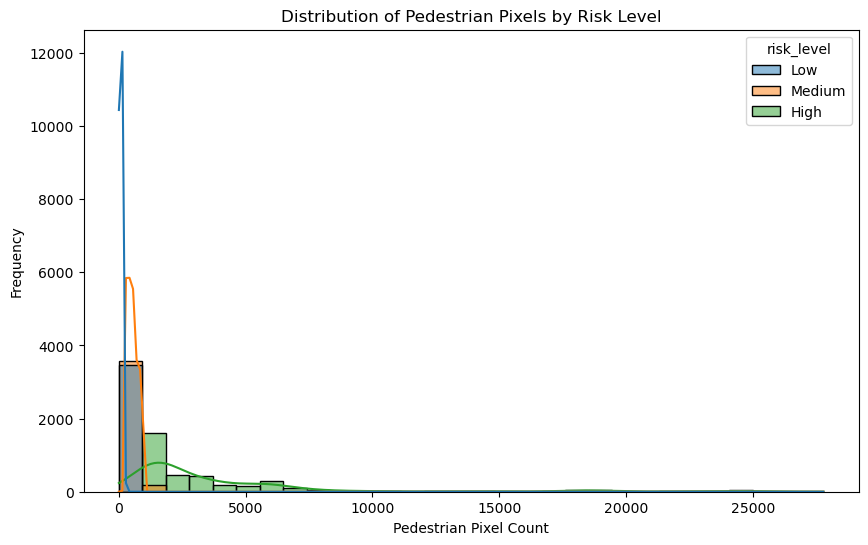

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(df, x="pedestrian_pixels", hue="risk_level", bins=30, kde=True)
plt.xlabel("Pedestrian Pixel Count")
plt.ylabel("Frequency")
plt.title("Distribution of Pedestrian Pixels by Risk Level")
plt.show()

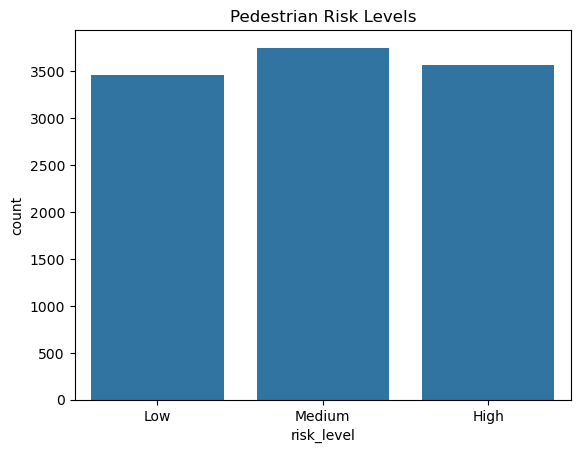

In [18]:
sns.countplot(data=df, x="risk_level")
plt.title("Pedestrian Risk Levels")
plt.show()
